# **Beginners Need A Small End-to-End Project**

Books and courses are frustrating. They give you lots of recipes and snippets, but you never get to see how they all fit together.

When you are applying machine learning to your own datasets, you are working on a project.

A machine learning project may not be linear, but it has a number of well known steps:

What are those well known steps?



**Answer:**



1.   Import packages/ libraries
2.   Add data
3.   Find best fit regression model
4.   Check model
5.   Use the model for future predictions




**Topics/Features**

* Attributes are numeric so you have to figure out how to load and handle data.
* It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
* It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
* It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
* All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started
* We are going to visualize the data set here
* And make some predictions

**NOTE: for certain activities I will be asking you to do certain things that I feel like you should know how to do**

# **Beginning of Project**

In [ ]:
#Please import the following libraries and check the versions of the libraries
import sys
import scipy
import numpy as np
import matplotlib as pyplot
import pandas as pd
import sklearn

In [ ]:
#Please Import the following modules from your libraries
#You will be required to know which from where


#find library documentations

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# load dataset with this url
#csv is comma separated values
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
my_data = pd.read_csv(url)
#.read returns a dataframe

# using this names list
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#my_dataframe = pd.DataFrame(data=my_data, columns= names)
my_data.columns = names
print(my_data)
#add names to columns field



     sepal-length  sepal-width  petal-length  petal-width           class
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]


In [ ]:
# print shape of data
print(my_data.shape)

(149, 5)


In [ ]:
# print first 20 rows of data
print(my_data.head(20), "\n")


    sepal-length  sepal-width  petal-length  petal-width        class
0            4.9          3.0           1.4          0.2  Iris-setosa
1            4.7          3.2           1.3          0.2  Iris-setosa
2            4.6          3.1           1.5          0.2  Iris-setosa
3            5.0          3.6           1.4          0.2  Iris-setosa
4            5.4          3.9           1.7          0.4  Iris-setosa
5            4.6          3.4           1.4          0.3  Iris-setosa
6            5.0          3.4           1.5          0.2  Iris-setosa
7            4.4          2.9           1.4          0.2  Iris-setosa
8            4.9          3.1           1.5          0.1  Iris-setosa
9            5.4          3.7           1.5          0.2  Iris-setosa
10           4.8          3.4           1.6          0.2  Iris-setosa
11           4.8          3.0           1.4          0.1  Iris-setosa
12           4.3          3.0           1.1          0.1  Iris-setosa
13           5.8    

In [ ]:
my_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#group data by "class"
#describe shows data in a table format, very neat
#my_data.groupby("class").first()
temp = my_data.groupby("class")
print(temp.describe())



print(my_data.groupby("class").size())

                sepal-length                                                 \
                       count      mean       std  min    25%  50%  75%  max   
class                                                                         
Iris-setosa             49.0  5.004082  0.355879  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936000  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588000  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal-width            ... petal-length      petal-width  \
                      count      mean  ...          75%  max       count   
class                                  ...                                 
Iris-setosa            49.0  3.416327  ...        1.600  1.9        49.0   
Iris-versicolor        50.0  2.770000  ...        4.600  5.1        50.0   
Iris-virginica         50.0  2.974000  ...        5.875  6.9        50.0   

                                                              
     

sepal-length       Axes(0.125,0.53;0.352273x0.35)
sepal-width     Axes(0.547727,0.53;0.352273x0.35)
petal-length       Axes(0.125,0.11;0.352273x0.35)
petal-width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

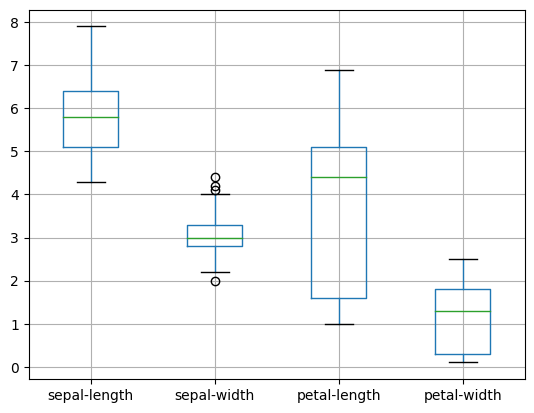

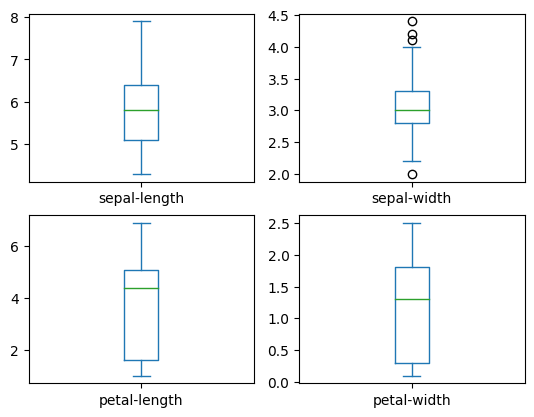

In [ ]:
# create a box and whisket plot for the data
#comparing the output of 2 different libraries

# pyplot
my_data.boxplot()
my_data.plot(kind="box", subplots = True, layout=(2,2), sharex = False, sharey = False)


<function matplotlib.pyplot.show(close=None, block=None)>

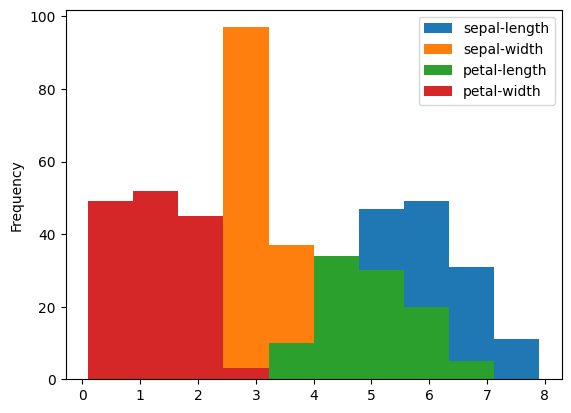

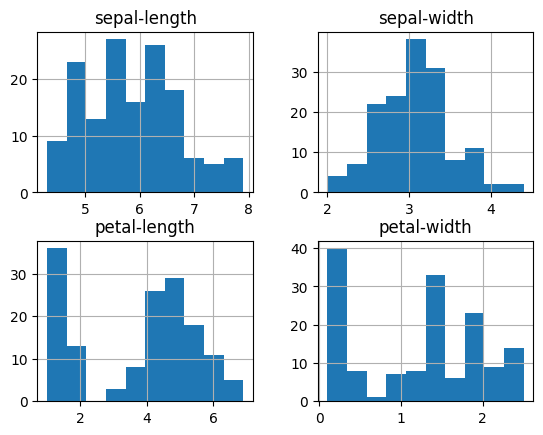

In [ ]:
# create a histogram of the data

#histogram of all classes
my_data.plot.hist()

#4 histograms of all classes separated
my_data.hist()
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

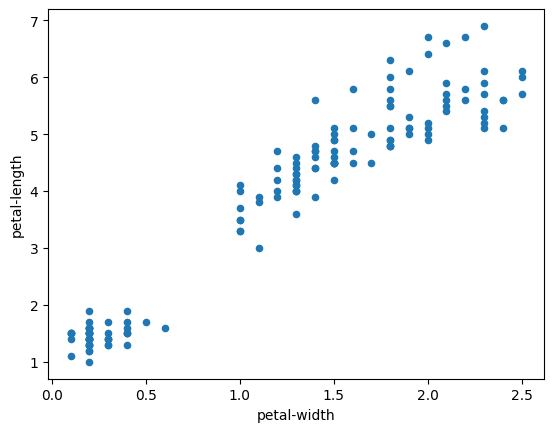

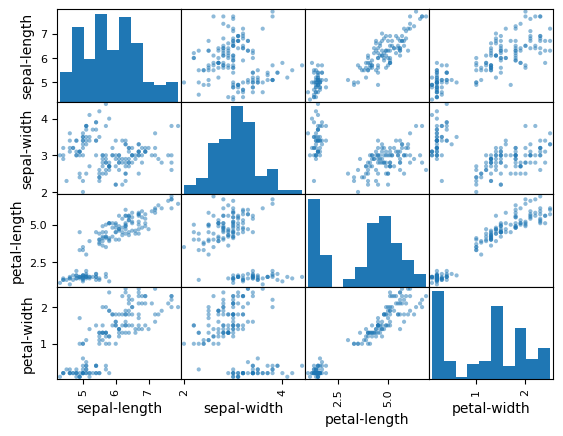

In [ ]:
# create a scatter plot matrix of the data

#test scatter plot of petal width against length
my_data.plot.scatter('petal-width', 'petal-length')

#actual scatter matrix
scatter_matrix(my_data)
#pyplot.show only shows the plot
pyplot.show

#very interesting, graphs all features against all other features (for x and y),
# but returns a frequency histogram when graphing a feature against itself

#Also my initial scatterplot matches the one in the scatter matrix!

We need to know that the model we created is good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [ ]:
# Create your train test split with a test size of 20%

from numpy.random.mtrand import RandomState
# Create arrays for your dataset
# Assign to X and Y
#old code, being overwritten later
x = my_data.get('petal-length')
y = my_data.get('petal-width')

#use this to create the test, train split
array = my_data.values
#array syntax, basically, x includes all from index 0 (inclusive) to 4(exclusive)
#y includes just index 4 (inclusive) (duh)

#Customary to make X capital and y lowercase to distinguish from other types of data
x = array[:,0:4]
y = array[:,4]

#splits the x and y arrays provided into 80 percent to train the model on and 20 percent of data to test later
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.2, random_state=1, shuffle = True)

#print(x)


We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 6 different algorithms:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).
* This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

Let’s build and evaluate our models:

In [ ]:
LogisticRegression,
# Try Spot checking all your models for yourself

#cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

# Trying to create my own algo w/o looking at the hidden code

models = [
  LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train,Y_train),
  LinearDiscriminantAnalysis().fit(X_train,Y_train),
  KNeighborsClassifier().fit(X_train,Y_train),
  DecisionTreeClassifier().fit(X_train,Y_train),
  GaussianNB().fit(X_train,Y_train),
  SVC(gamma='auto').fit(X_train,Y_train)
]

arr = []
for i in models:
  # More splits most likely means more accurate data, how many chunks of data basically
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(i, X_train, Y_train, cv=kfold, scoring='accuracy')
  #r ^ 2 like the measure of variance we learned about in stats!
  r_sq = i.score(X_train,Y_train)
  print(f"coefficient of determination: {r_sq}")
  print("Mean: %s" % cv_results.mean())
  print( cv_results.std())
  print("\n")
  arr.append([cv_results.mean(), cv_results.std()])


# make models variable
# append models above
# evaluate each model's results using a for loop
# you should consider kfold and cross val score in this loop
# print results


coefficient of determination: 0.9411764705882353
Mean: 0.9409090909090908
0.07528641362912028


coefficient of determination: 0.9747899159663865
Mean: 0.975
0.05335936864527373


coefficient of determination: 0.9663865546218487
Mean: 0.9583333333333333
0.05590169943749474


coefficient of determination: 1.0
Mean: 0.9409090909090908
0.05376119696730355


coefficient of determination: 0.957983193277311
Mean: 0.9583333333333333
0.07682953714410741


coefficient of determination: 0.9747899159663865
Mean: 0.975
0.05335936864527373




# Hiding Code**

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.940909 (0.075286)
LDA: 0.975000 (0.053359)
KNN: 0.958333 (0.055902)
CART: 0.949242 (0.055778)
NB: 0.958333 (0.076830)
SVM: 0.975000 (0.053359)


# **Selecting the Best Model and Continuing Project**

Spoiler your data should support using Support Vector Machines.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

         LR       LDA       KNN      CART        NB       SVC
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  1.000000  1.000000  1.000000  1.000000  0.916667  1.000000
2  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
3  0.916667  0.916667  0.916667  0.916667  1.000000  0.916667
4  0.916667  1.000000  1.000000  1.000000  1.000000  1.000000
5  0.750000  0.833333  0.833333  0.833333  0.750000  0.833333
6  1.000000  1.000000  0.916667  1.000000  1.000000  1.000000
7  1.000000  1.000000  1.000000  0.916667  0.916667  1.000000
8  0.916667  1.000000  0.916667  0.916667  1.000000  1.000000
9  0.909091  1.000000  1.000000  0.909091  1.000000  1.000000


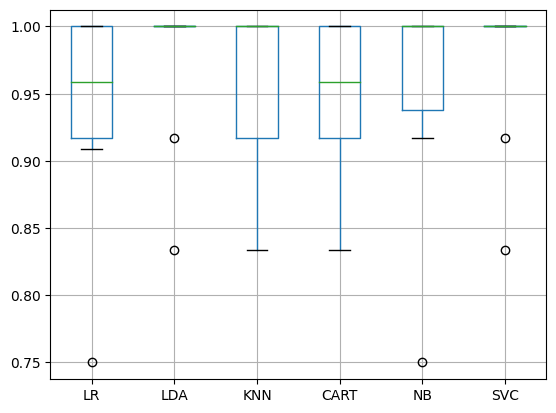

In [ ]:
# Create a box and whisket plot that compares algorithms
# it should mimic the one below. Including title.
# change some colors for pop

#Box Plot 1 using in-built method
names = ["LR", "LDA", "KNN", "CART", "NB", "SVC"]
temp = []

temp = results

plots = np.array(temp[:6])

dff = pd.DataFrame(data=plots)
#had to flip x and y, was originally giving me 10 columns of 6
df = dff.transpose()

#initializing columns field with names array
df.columns = names
df.boxplot()
print(df)

#10 LDA readings and 10 SVC readings have multiple 1s for some reason and have exact same readings?




<function matplotlib.pyplot.show(close=None, block=None)>

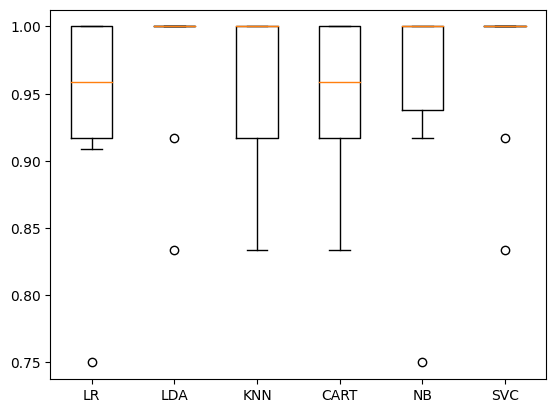

In [ ]:
#Box Plot 2 using pyplot
#Neither showing correct results >> my data does not match expected so it makes sense

pyplot.boxplot(results, labels = names)
pyplot.show

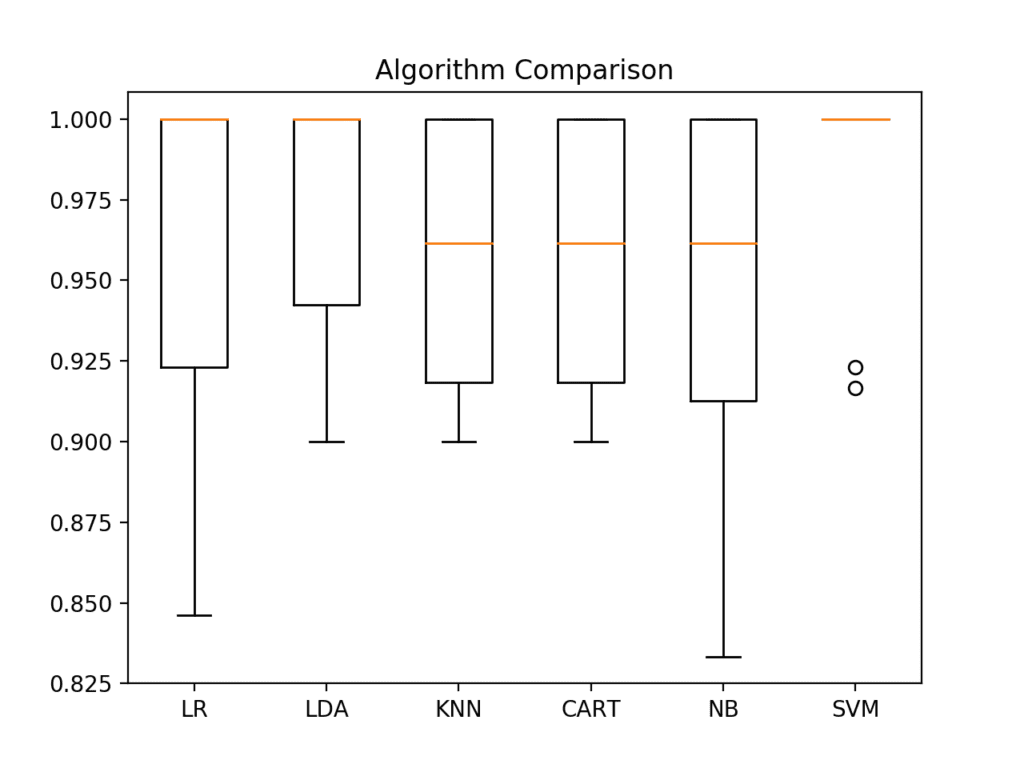

In [ ]:
# make some predictions using your model
# make predictions on the validation set

for name, i in models:
  print(name)
  i.fit(X_train, Y_train) # train the whole training set
  predictions = i.predict(X_validation) # predict on test set
  print("Accuracy:", accuracy_score(Y_validation, predictions))
  print("Confusion Matrix:")
  print(confusion_matrix(Y_validation, predictions))
  print("Classification Report:")
  print(classification_report(Y_validation, predictions))

LR
Accuracy: 0.9333333333333333
Confusion Matrix:
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30

LDA
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00  

In [ ]:
# Evaluate your predictions
# use accuracy score
# confusion matrix
# classification report